In [157]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [158]:
x = np.radians(np.linspace(1,200)).reshape(-1,1)
y = np.cos(x) + np.random.uniform(-0.1,0.1,x.shape[0]).reshape(-1,1)

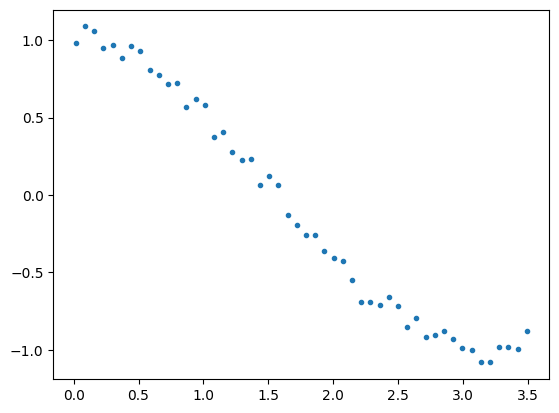

In [159]:
plt.scatter(x.reshape(-1),y,marker='.')

In [160]:
def train(x,y,d=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

In [161]:
train(x,y,1)[:3]

(LinearRegression(), 0.966043401462126, 0.10359797439095358)

In [162]:
train(x,y,2)[:3]

(LinearRegression(), 0.9759572774450835, 0.09417170872386446)

In [163]:
train(x,y,3)[:3]

(LinearRegression(), 0.9953337291548517, 0.043513772353566973)

In [164]:
train(x,y,5)[:3]

(LinearRegression(), 0.9954261587891844, 0.043529589678726645)

In [165]:
res=[]
for i in range(1,15):
    r = train(x,y,i)[:3]
    res.append(r)
res

[(LinearRegression(), 0.966043401462126, 0.10359797439095358),
 (LinearRegression(), 0.9759572774450835, 0.09417170872386446),
 (LinearRegression(), 0.9953337291548517, 0.043513772353566973),
 (LinearRegression(), 0.9953943505512339, 0.04362175089699325),
 (LinearRegression(), 0.9954261587891844, 0.043529589678726645),
 (LinearRegression(), 0.9955658139699529, 0.04290062763374964),
 (LinearRegression(), 0.9959062921081034, 0.041022977515240255),
 (LinearRegression(), 0.9959309518524225, 0.0411338592208608),
 (LinearRegression(), 0.9959310048243267, 0.04114478978209938),
 (LinearRegression(), 0.9961757957407403, 0.03991647088519203),
 (LinearRegression(), 0.9962442563117005, 0.039847235447506485),
 (LinearRegression(), 0.9962821889743158, 0.03973325046295804),
 (LinearRegression(), 0.9964095439411286, 0.03820892138301231),
 (LinearRegression(), 0.9964137331371898, 0.038263316714005284)]

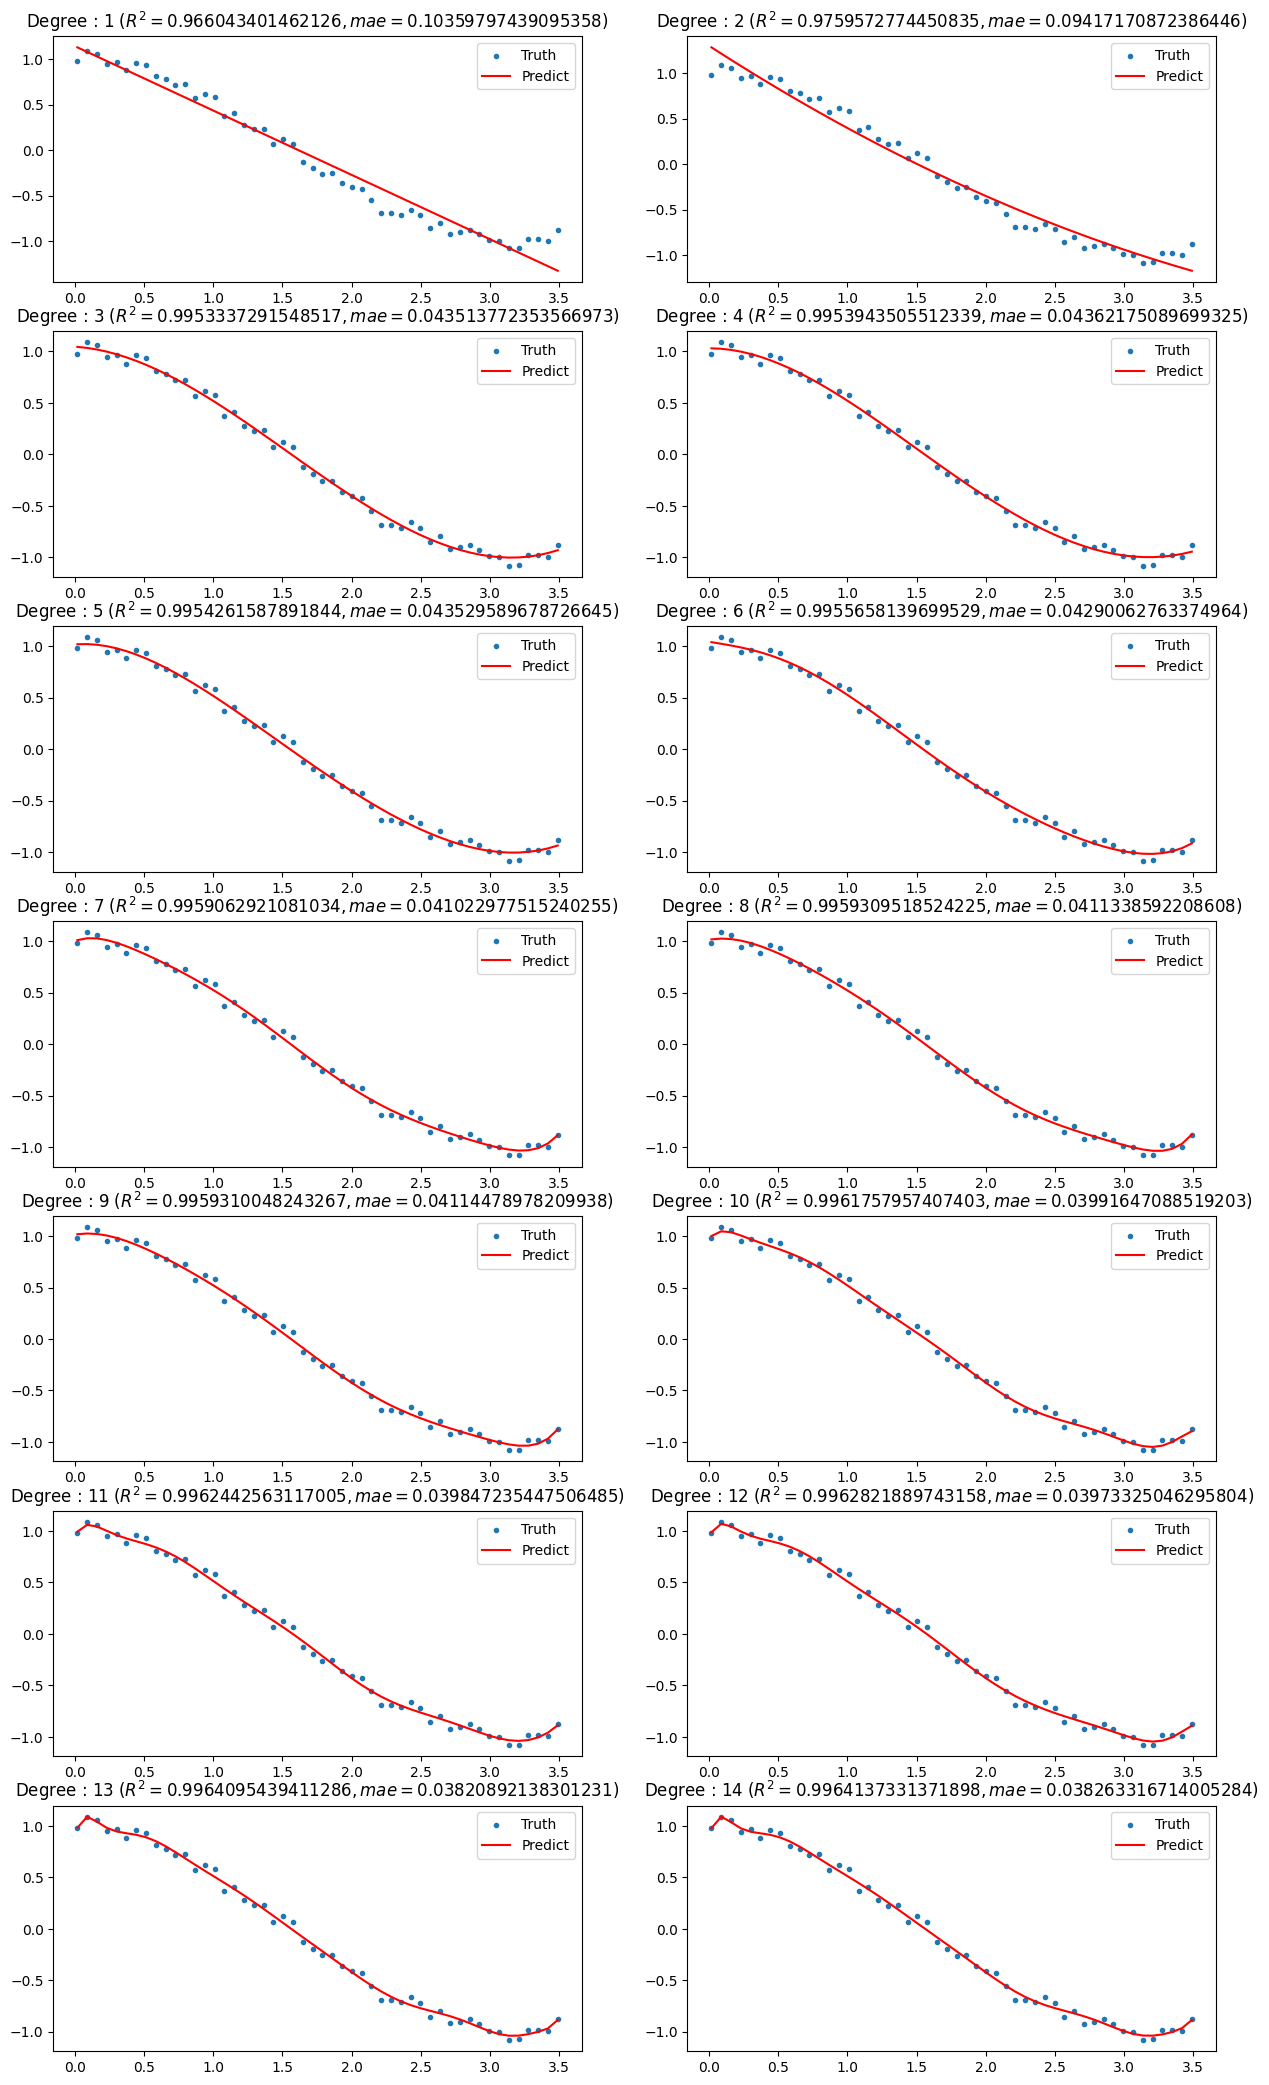

In [166]:
plt.figure(figsize=(15,30))


for i in range(1,15):
    plt.subplot(8,2,i)
    plt.scatter(x,y,marker='.')
    model = train(x,y,i )
    p = np.array(model[3]).reshape(-1,1)
    plt.plot(x,p,'r')
    plt.legend(['Truth','Predict'])
    plt.title(f'Degree : {i} ($R^2={model[1]} ,mae={model[2]}$)')

Text(0.5, 1.0, 'Degree : 100')

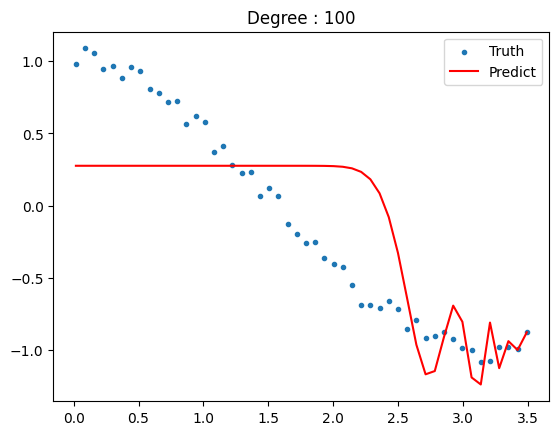

In [167]:

plt.scatter(x,y,marker='.')
p = np.array(train(x,y,50 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

Text(0.5, 1.0, 'Degree : 100')

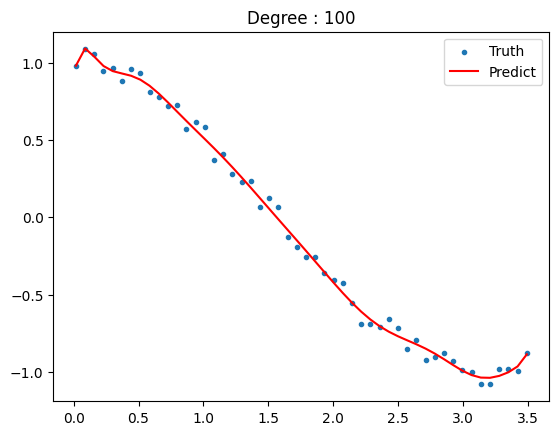

In [168]:
plt.scatter(x,y,marker='.')
p = np.array(train(x,y,14 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

In [171]:
def train_ridge(x,y,d=1,alpha=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = Ridge(alpha= alpha)
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

Text(0.5, 1.0, 'Degree : 100')

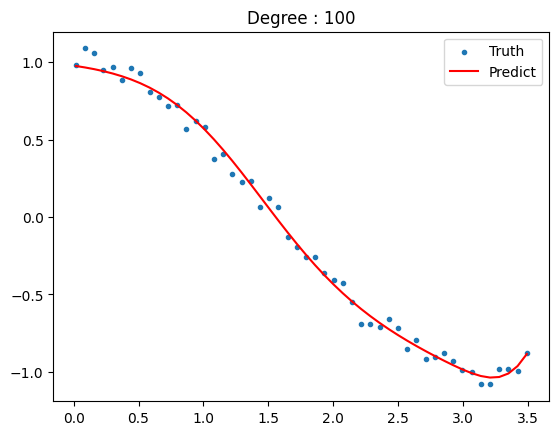

In [175]:
plt.scatter(x,y,marker='.')
p = np.array(train_ridge(x,y,14,2 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

In [181]:
def train_Lasso(x,y,d=1,alpha=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = Lasso(alpha= alpha,max_iter=10000)
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

c:\Users\Taha\Desktop\python_p\AI\Learning_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.668e-02, tolerance: 2.709e-03
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Degree : 100')

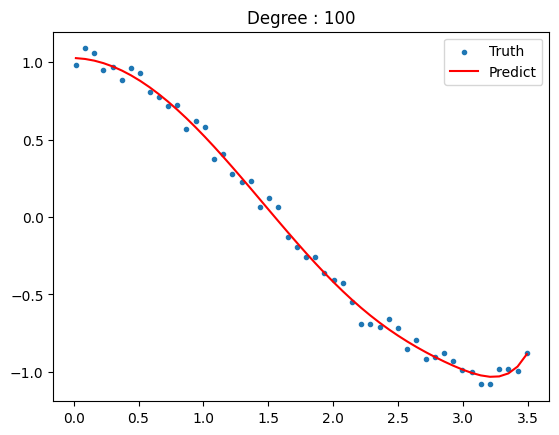

In [183]:
plt.scatter(x,y,marker='.')
p = np.array(train_Lasso(x,y,14,0.00000001 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')